In [6]:
from a_star.two_d_map import map2D
from a_star.a_star_solver import aStar
from safty_ellipse.safty_area import safetyEllipse
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from PIL import Image

In [7]:
def load_map_from_pic(path):
    image = Image.open(path)
    image = image.convert('L')
    image = image.convert('1')
    data = np.asarray(image)
    data = 1 * data
    data[0, :] = 0
    data[-1, :] = 0
    data[:, 0] = 0
    data[:, -1] = 0
    data = data + 1 - data * 2
    return data

In [31]:
warehouse_map =  map2D(load_map_from_pic("./img/warehouse2_original.bmp"))
warehouse_balloon = map2D(load_map_from_pic("./img/warehouse2_balloon.bmp"))

start astar searching on original map
astar finished!


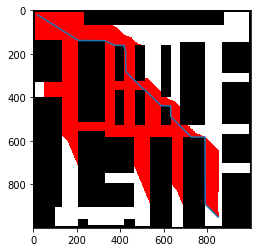

In [23]:
astar_solver = aStar(warehouse_map)
start_p = np.array([20, 20])
end_p = np.array([950, 850])
print("start astar searching on original map")
path = np.array(astar_solver.path_plan(start_p, end_p, visual=False, draw_count=100000))
filter_path = np.array(astar_solver.line_fitter(path))
filter_path = np.array([[ 20,  20],
                         [138, 208],
                         [139, 328],
                         [160, 375],
                         [161, 419],
                         [162, 419],
                         [177, 420],
                         [183, 425],
                         [282, 426],
                         [364, 509],
                         [365, 514],
                         [438, 588],
                         [439, 632],
                         [440, 632],
                         [489, 633],
                         [582, 727],
                         [583, 790],
                         [584, 790],
                         [891, 791],
                         [950, 850]])
# render the path and the final result
path_y = filter_path.T[0]
path_x = filter_path.T[1]
sio.savemat("./warehouse2/astar_warehouse2.mat", {'astar_result_original': warehouse_map.color_stat})
img_result = astar_solver.map2d.render_image()
plt.imshow(img_result)
plt.plot(path_x, path_y)
plt.savefig('./warehouse2/warehouse2_astar_original.png', dpi=400)
plt.show()
# print final result
# print("Filtered path: {}".format(filter_path))

start astar searching on ballooned map
astar finished!


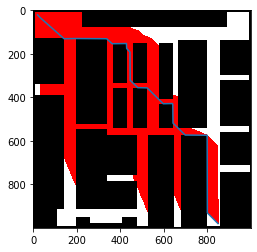

In [32]:
astar_solver = aStar(warehouse_balloon)
start_p = np.array([20, 20])
end_p = np.array([980, 850])
print("start astar searching on ballooned map")
path = np.array(astar_solver.path_plan(start_p, end_p, visual=False, draw_count=100000))
filter_path = np.array(astar_solver.line_fitter(path))
filter_path = np.array([[ 20,  20],
                         [ 32,  31],
                         [130, 142],
                         [129, 199],
                         [130, 338],
                         [153, 363],
                         [152, 429],
                         [175, 430],
                         [191, 445],
                         [321, 446],
                         [355, 481],
                         [356, 524],
                         [429, 598],
                         [428, 640],
                         [431, 642],
                         [518, 643],
                         [573, 699],
                         [574, 800],
                         [575, 800],
                         [931, 801],
                         [980, 850]])
# render the path and the final result
path_y = filter_path.T[0]
path_x = filter_path.T[1]
sio.savemat("./warehouse2/astar_warehouse2_balloon.mat", {'astar_result_balloon': warehouse_balloon.color_stat})
img_result = astar_solver.map2d.render_image()
plt.imshow(img_result)
plt.plot(path_x, path_y)
plt.savefig('./warehouse2/warehouse2_astar_balloon.png', dpi=400)
plt.show()

calculate start.
calculate finish, start rendering.


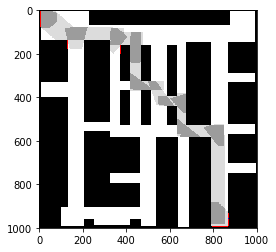

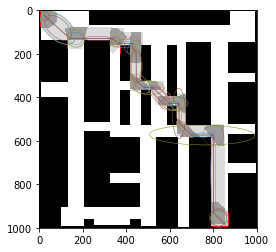

In [37]:
path_out = [[ 20,  20],
             [ 32,  31],
             [130, 142],
             [129, 199],
             [130, 338],
             [153, 363],
             [152, 429],
             [175, 430],
             [191, 445],
             [321, 446],
             [355, 481],
             [356, 524],
             [429, 598],
             [428, 640],
             [431, 642],
             [518, 643],
             [573, 699],
             [574, 800],
             [575, 800],
             [931, 801],
             [980, 850]]
warehouse_map =  map2D(load_map_from_pic("./img/warehouse2_original.bmp"))
path = np.array(path_out)
path_y = path.T[0]
path_x = path.T[1]
print("calculate start.")
safety_ellipse = safetyEllipse(warehouse_map, 50)
cons_list, ellipse_list = safety_ellipse.ellipse_generate(path)
print("calculate finish, start rendering.")
img_result = safety_ellipse.map2d.render_image()
plt.imshow(img_result)
plt.ylim(0, 1000)
plt.xlim(0, 1000)
plt.gca().invert_yaxis()
plt.savefig('./warehouse2/warehouse2_no_ellipse.png', dpi=400)
plt.show()

plt.imshow(img_result)
for elli_stack in ellipse_list:
    for ellipse in elli_stack:
        single_ellipse = safety_ellipse.ellipse_mesh(ellipse)
        plt.plot(single_ellipse[0], single_ellipse[1], linewidth=0.3)
plt.ylim(0, 1000)
plt.xlim(0, 1000)
plt.plot(path_x, path_y, linewidth=0.8)
plt.gca().invert_yaxis()
plt.savefig('./warehouse2/warehouse2_ellipse.png', dpi=400)
plt.show()
sio.savemat("./warehouse2/warehouse2_constraints_data.mat",
            {'path': path_out,
             'constraints': cons_list})